# Exemples de base sur le module NumPy.

#### Copyright(C) 2024, Charles Theetten, <chalimede@proton.me>

In [ ]:
Les codes présentés dans ce notebook sont des exemples de base qui servent avant tout à se familiariser avec le module NumPy pour la science des données.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X           = np.zeros(shape = (6, 6))
X[0:3, 0:3] = 1
X[3:6, 3:6] = -1

print(X)

[[ 1.  1.  1.  0.  0.  0.]
 [ 1.  1.  1.  0.  0.  0.]
 [ 1.  1.  1.  0.  0.  0.]
 [ 0.  0.  0. -1. -1. -1.]
 [ 0.  0.  0. -1. -1. -1.]
 [ 0.  0.  0. -1. -1. -1.]]


In [3]:
X         = np.zeros(shape = (6, 6))
X[0:, 0:] = [ i for i in range(6) ]

print(X)

[[0. 1. 2. 3. 4. 5.]
 [0. 1. 2. 3. 4. 5.]
 [0. 1. 2. 3. 4. 5.]
 [0. 1. 2. 3. 4. 5.]
 [0. 1. 2. 3. 4. 5.]
 [0. 1. 2. 3. 4. 5.]]


In [4]:
X = np.ones((10, 4))

for i, row in enumerate(X):
    row *= i
    #M[i, :] = row * i

print(X)

[[0. 0. 0. 0.]
 [1. 1. 1. 1.]
 [2. 2. 2. 2.]
 [3. 3. 3. 3.]
 [4. 4. 4. 4.]
 [5. 5. 5. 5.]
 [6. 6. 6. 6.]
 [7. 7. 7. 7.]
 [8. 8. 8. 8.]
 [9. 9. 9. 9.]]


In [5]:
def f(X):
    return np.exp(np.sin(X) + np.cos(X))


X = np.array([i / 100 for i in range(20)])
print(np.round(f(X)[:10], decimals = 2))

[2.72 2.75 2.77 2.8  2.83 2.85 2.88 2.91 2.94 2.96]


In [6]:
def g(X):
    print(X.shape)

    for i in range(X.shape[0]):
        X[i] = np.exp(np.sin(X[i]) + np.cos(X[i]))

    return X


X = np.array([i / 100 for i in range(20)])
print(np.round(g(X)[:10], decimals = 2))

(20,)
[2.72 2.75 2.77 2.8  2.83 2.85 2.88 2.91 2.94 2.96]


In [7]:
from time import time


X     = np.array([i / 1e7 for i in range(int(1e7))])

start = time()
f(X)
end   = time()

t     = end - start
print(f"Le calcul de f avec numpy a pris {t:.3f} secondes")

start = time()
g(X)
end   = time()

t     = end - start
print(f"Le calcul de f sans numpy a pris {t:.3f} secondes")

Le calcul de f avec numpy a pris 0.127 secondes
(10000000,)
Le calcul de f sans numpy a pris 37.224 secondes


In [8]:
items      = np.array(["raquette", "ordinateur", "vélo", "jeans", "pain", "eau", "pizzas", "lunettes"])
discounts  = np.array([25, 25, 50, 25, 50, 50, 50, 75])

print(items[discounts == 50])
print(discounts[items == "vélo"])

['vélo' 'pain' 'eau' 'pizzas']
[50]


In [9]:
from sklearn.datasets import load_digits


digits     = load_digits()
X          = digits['data']

print(X.shape)

X_reshaped = X.reshape(1797, 8, 8)
img1       = X_reshaped[199]
img2       = X_reshaped[620]
img3       = np.concatenate([img1, img2], axis = 1)

(1797, 64)


Text(0.5, 1.0, 'Concaténation')

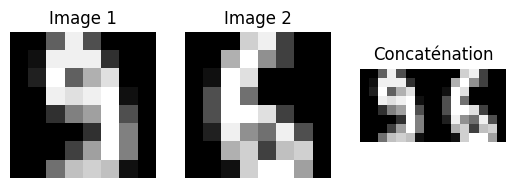

In [10]:
plt.subplot(1, 3, 1)
plt.imshow(img1, cmap = 'gray')
plt.axis("off")
plt.title("Image 1")

plt.subplot(1, 3, 2)
plt.imshow(img2, cmap = 'gray')
plt.axis("off")
plt.title("Image 2")

plt.subplot(1, 3, 3)
plt.imshow(img3, cmap = 'gray')
plt.axis("off")
plt.title("Concaténation")

In [11]:
def matrix_power(M, n):
    B = M

    for i in range(0, n):
        B = B.dot(M)

    return B


M = np.array([[1, -1],
              [-1, 1]])

print(matrix_power(M, 4))

[[ 16 -16]
 [-16  16]]


In [12]:
def matrix_rotation(theta):
    return np.array([[np.cos(theta), -np.sin(theta)],
                     [np.sin(theta), np.cos(theta)]])


X  = np.ones((2, 1))
R1 = matrix_rotation(np.pi).dot(X)
R2 = matrix_rotation(np.pi / 4).dot(matrix_rotation(3 * np.pi / 4)).dot(X)

print(X)
print(R1)
print(R2)
print(np.allclose(R1 , R2))

[[1.]
 [1.]]
[[-1.]
 [-1.]]
[[-1.]
 [-1.]]
True


In [13]:
def normalisation_min_max(X):
    X_norm  = np.transpose(X)
    min_max = np.zeros((3, 2))

    for i, row in enumerate(X_norm):
        for j, col in enumerate(row):
            min_max[j, i] = (X_norm[i, j] - np.min(row)) / (np.max(row) - np.min(row))

    return min_max


X       = np.array([[5, 10], [4, 8], [3, 6]])
X_tilde = (X - X.min(axis = 0)) / (X.max(axis = 0) - X.min(axis = 0))

print(normalisation_min_max(X))
print("----------")
print(X_tilde)

[[1.  1. ]
 [0.5 0.5]
 [0.  0. ]]
----------
[[1.  1. ]
 [0.5 0.5]
 [0.  0. ]]


In [14]:
def mean_squared_error(X, beta, y):
    y_theta = X.dot(beta)

    return np.square((y_theta - y)).mean()

In [15]:
X       = np.array([5, 4, 3])
y       = np.array([10, 8, 6])

beta    = np.linspace(start = 1.0, stop = 3.0, num = 40)
errors  = [ mean_squared_error(X, beta[i], y) for i in range(40) ]

print(np.round(errors, decimals = 2)[:-10:-1])

[16.67 15.   13.42 11.93 10.53  9.22  7.99  6.85  5.8 ]


In [16]:
errors       = np.array(errors)
beta_optimal = beta[errors.argmin()]
y_hat        = X.dot(beta_optimal)

print(y)
print(np.round(beta_optimal, 2))
print(np.round(y_hat, 2))
print(f"Écart moyen entre valeurs réelles et valeurs prédites: {np.round(np.abs(y - y_hat).mean(), 2)}.")

[10  8  6]
1.97
[9.87 7.9  5.92]
Écart moyen entre valeurs réelles et valeurs prédites: 0.1.
